Exercício 1 \
Imprima um gráfico de barras que mostre o valor médio do índice de percepção de corrupção por continente (faça a média dos índices dos países de cada continente). \
Dica: use a função groupby do pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
df= pd.read_csv("CPI_2014.csv", encoding ='latin-1')

In [3]:
df.head()

,Rank,Country,CPI_2014,Continent
0,1,Denmark,92,Europe
1,2,New Zealand,91,Oceania
2,3,Finland,89,Europe
3,4,Sweden,87,Europe
4,5,Norway,86,Europe


In [4]:
df2 = df.groupby('Continent')['CPI_2014'].mean()
df2

Continent
Africa           32.849057
Asia             38.133333
Europe           58.642857
North America    48.157895
Oceania          62.000000
South America    39.583333
Name: CPI_2014, dtype: float64

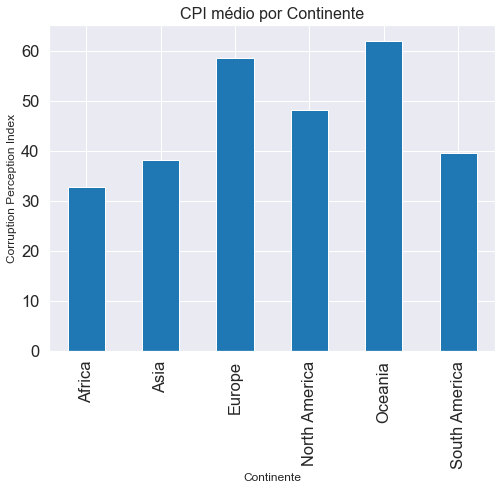

In [5]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
df2.plot(kind="bar",stacked=False)
plt.title("CPI médio por Continente")
plt.ylabel("Corruption Perception Index")
plt.xlabel("Continente")
plt.show()

Exercício 2 \
Usando o dataset 'usd2brl.csv' plote um gráfico de linha que mostre a evolução da cotação do dólar em relação ao real a partir de 2020.


In [12]:
df= pd.read_csv("usd2brl.csv", encoding ='latin-1')
df.head()

,datetime,usd_brl
0,1994-07-04,0.940
1,1994-07-05,0.932
2,1994-07-06,0.915
3,1994-07-07,0.910
4,1994-07-08,0.920


In [13]:
df2 = df[df['datetime']>'2019-12-31']
df2.head()

,datetime,usd_brl
6400,2020-01-02,4.0213
6401,2020-01-03,4.0522
6402,2020-01-06,4.0554
6403,2020-01-07,4.0841
6404,2020-01-08,4.0672


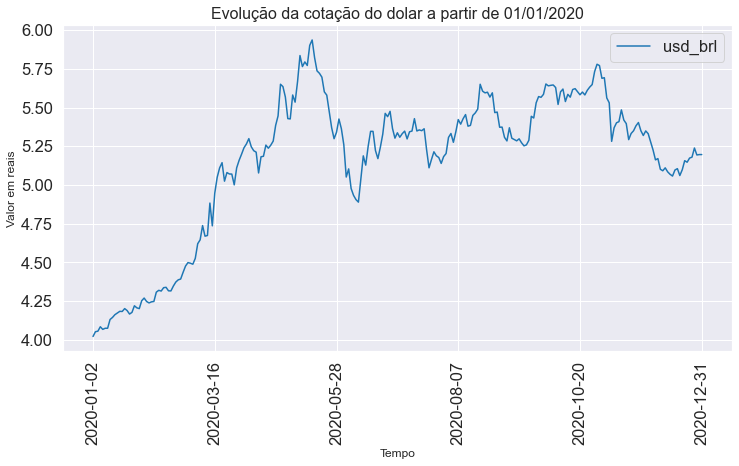

In [14]:
plt.rcParams["figure.figsize"] = [12,6]
sns.set_style("darkgrid")
df2.plot(x='datetime', y='usd_brl')
plt.title("Evolução da cotação do dolar a partir de 01/01/2020")
plt.xlabel("Tempo")
plt.ylabel("Valor em reais")
plt.xticks(rotation=90)
plt.show()

Exercício 3 \
Utitilizando o dataset "world_population.csv", exiba um gráfico de barras mostrando a população dos 10 países que possuem maior área territorial (Land Area). \
Dica: use as funções nlargest e sort_values.

In [15]:
df= pd.read_csv("world_population.csv", encoding ='latin-1')
df.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


In [16]:
df2 = df.nlargest(10, 'Land Area (KmÂ²)')
df3 = df2.sort_values(by="Population (2020)", ascending=False)
df3

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33
92,Kazakhstan,18776707,1.21,225280,7,2699700,-18000,2.8,31,58.0,0.24


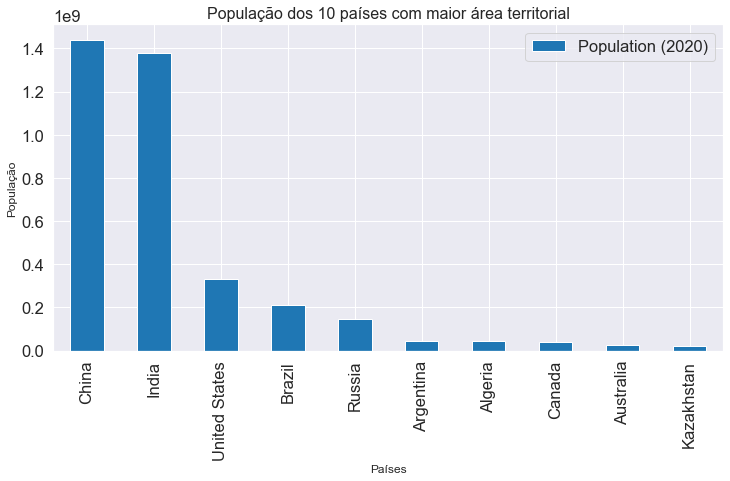

In [17]:
plt.rcParams["figure.figsize"] = [12,6]
df3.plot(x="Country/Other", y="Population (2020)", kind="bar",stacked=False)
plt.title("População dos 10 países com maior área territorial")
plt.xlabel("Países")
plt.ylabel("População")
plt.show()

Exercício 4 \
Utilizando o dataset "world_population.csv" exiba um gráfico de dispersão que exiba no eixo x a idade mediana do país e no eixo y a taxa de fertilidade. Olhando o gráfico resultante, responda o que é possível inferir a respeito da relação entre essas duas variáveis.

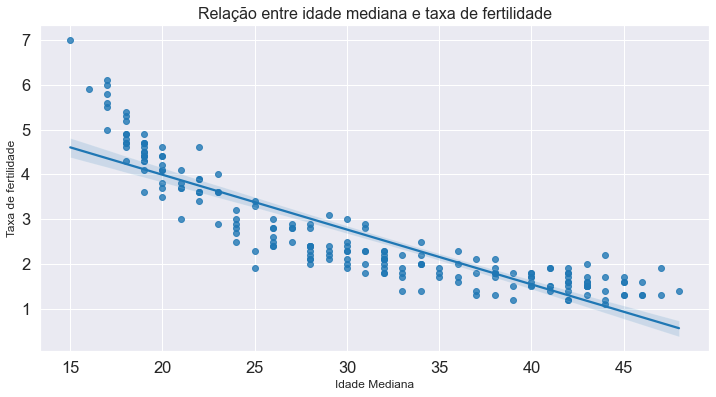

In [18]:
sns.regplot(x="Med. Age", y="Fert. Rate", fit_reg=True, data=df)
plt.title("Relação entre idade mediana e taxa de fertilidade")
plt.xlabel("Idade Mediana")
plt.ylabel("Taxa de fertilidade")
plt.show()

Exercício 5 \
Utilizando o dataset "titanic.csv", crie dois gráficos de pizza lado a lado contendo o número de sobreviventes vs não sobreviventes do sexo masculino (pizza 1) e do sexo feminino (pizza 2).

In [23]:
df= pd.read_csv("titanic.csv", encoding ='latin-1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df2 = df[df['Sex']=='male']
df3 = df2[df2['Survived']==1]
sobrev_m = len(df3)
df4 = df2[df2['Survived']==0]
n_sobrev_m = len(df4)
df2 = df[df['Sex']=='female']
df3 = df2[df2['Survived']==1]
sobrev_f = len(df3)
df4 = df2[df2['Survived']==0]
n_sobrev_f = len(df4)

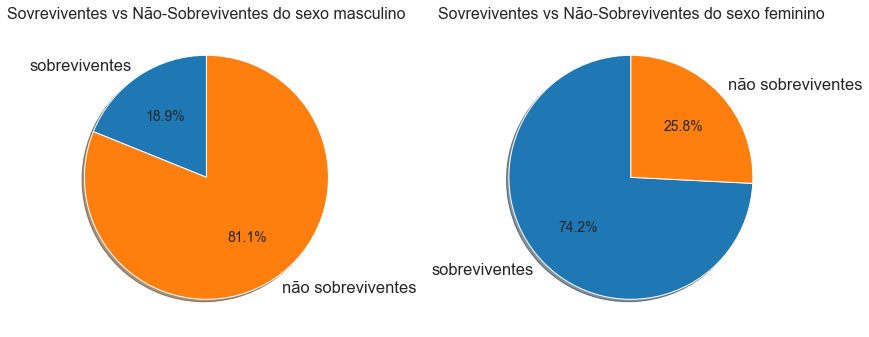

In [25]:
labels = 'sobreviventes', 'não sobreviventes'
plt.rcParams["figure.figsize"] = [12,8]
plt.subplot(1,2,1)
plt.pie([sobrev_m, n_sobrev_m], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Sovreviventes vs Não-Sobreviventes do sexo masculino")
plt.subplot(1,2,2)
plt.pie([sobrev_f, n_sobrev_f], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Sovreviventes vs Não-Sobreviventes do sexo feminino")
plt.tight_layout()
plt.show()
